Moving Averages are used to analyze the time-series data by calculating a series of averages of the different subsets of full dataset.

The simple moving average = (sum of the an asset price over the past n periods) / (number of periods)


EMA [today] = (α x Price [today] ) + ((1 — α) x EMA [yesterday] )
Where:
α = 2/(N + 1)
N = the length of the window (moving average period)
EMA [today] = the current EMA value
Price [today] = the current closing price
EMA [yesterday] = the previous EMA value

In [1]:
import pandas_datareader.data as web
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
start = datetime.datetime(2012, 9, 30) 
end = datetime.datetime(2022, 9, 30) 
# extract the closing price data
TSM_df = web.DataReader(['TSM'], 'yahoo', start = start, end = end)['Close']
TSM_df.columns = {'Close Price'}
TSM_df.head(10)

,Close Price
Date,
2012-10-01,15.900000
2012-10-02,16.000000
2012-10-03,16.049999
2012-10-04,16.160000
2012-10-05,16.070000
2012-10-08,15.530000
2012-10-09,15.360000
2012-10-10,15.120000
2012-10-11,15.030000


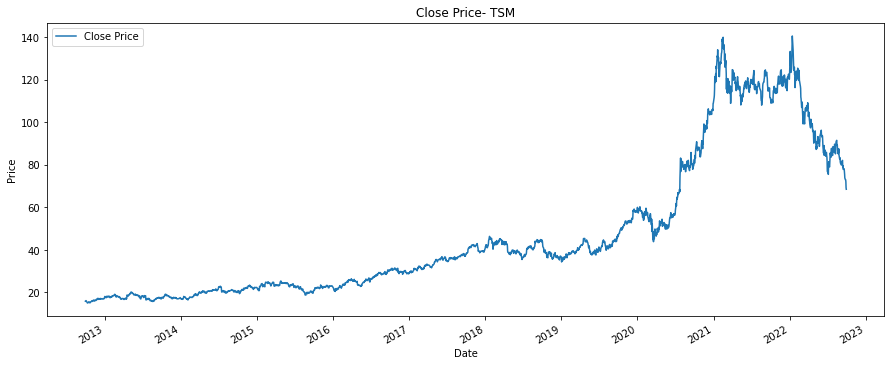

In [4]:
TSM_df[['Close Price']].plot(figsize=(15,6))
plt.title('Close Price- TSM')
plt.ylabel('Price')
plt.show()

In [5]:
 #20 days SMA
TSM_df['20_SMA'] = TSM_df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days SMA
TSM_df['50_SMA'] = TSM_df['Close Price'].rolling(window = 50, min_periods = 1).mean()
TSM_df.head()

,Close Price,20_SMA,50_SMA
Date,,,
2012-10-01,15.900000,15.900000,15.900000
2012-10-02,16.000000,15.950000,15.950000
2012-10-03,16.049999,15.983333,15.983333
2012-10-04,16.160000,16.027500,16.027500
2012-10-05,16.070000,16.036000,16.036000


In [6]:
TSM_df['Signal'] = 0.0
TSM_df['Signal'] = np.where(TSM_df['20_SMA'] > TSM_df['50_SMA'], 1.0, 0.0)

In [7]:
TSM_df['Position'] = TSM_df['Signal'].diff()
# display first few rows
TSM_df.head()

,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,
2012-10-01,15.900000,15.900000,15.900000,0.0,NaN
2012-10-02,16.000000,15.950000,15.950000,0.0,0.0
2012-10-03,16.049999,15.983333,15.983333,0.0,0.0
2012-10-04,16.160000,16.027500,16.027500,0.0,0.0
2012-10-05,16.070000,16.036000,16.036000,0.0,0.0


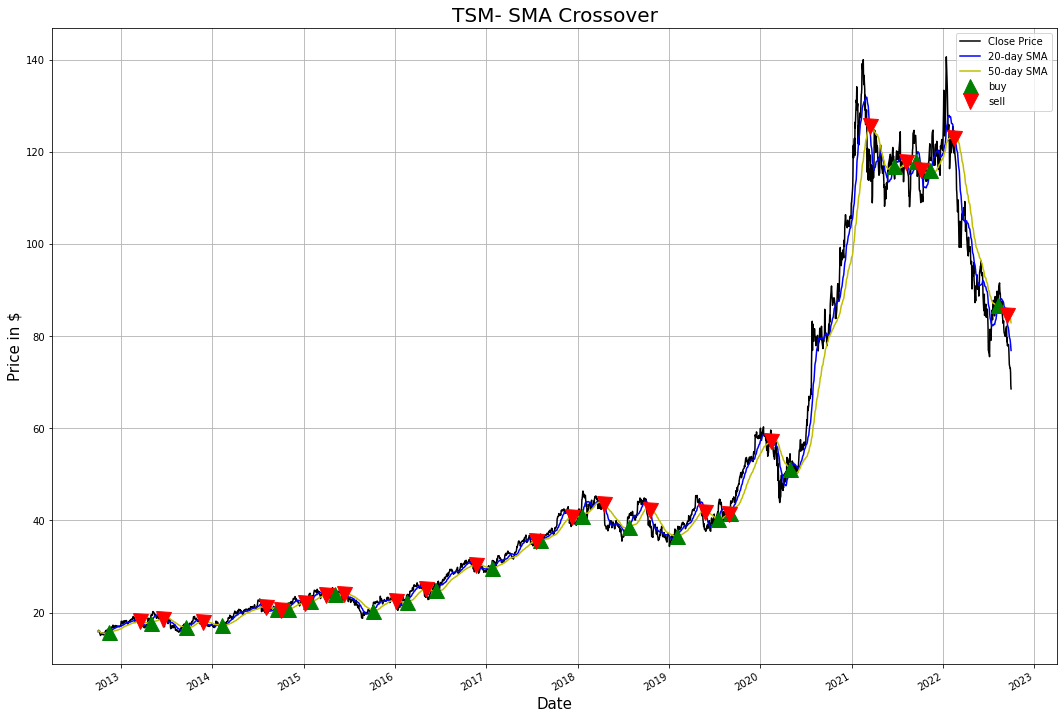

In [11]:
plt.figure(figsize = (18,13))
# plot close price, short-term and long-term moving averages 
TSM_df['Close Price'].plot(color = 'k', label= 'Close Price') 
TSM_df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
TSM_df['50_SMA'].plot(color = 'y',label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(TSM_df[TSM_df['Position'] == 1].index, 
         TSM_df['20_SMA'][TSM_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(TSM_df[TSM_df['Position'] == -1].index, 
        TSM_df['20_SMA'][TSM_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSM- SMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [12]:
TSM_df['20_EMA'] = TSM_df['Close Price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
TSM_df['50_EMA'] = TSM_df['Close Price'].ewm(span = 50, adjust = False).mean()

In [13]:
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0 
TSM_df['Signal'] = 0.0  
TSM_df['Signal'] = np.where(TSM_df['20_EMA'] > TSM_df['50_EMA'], 1.0, 0.0)

In [14]:
TSM_df['Position'] = TSM_df['Signal'].diff()


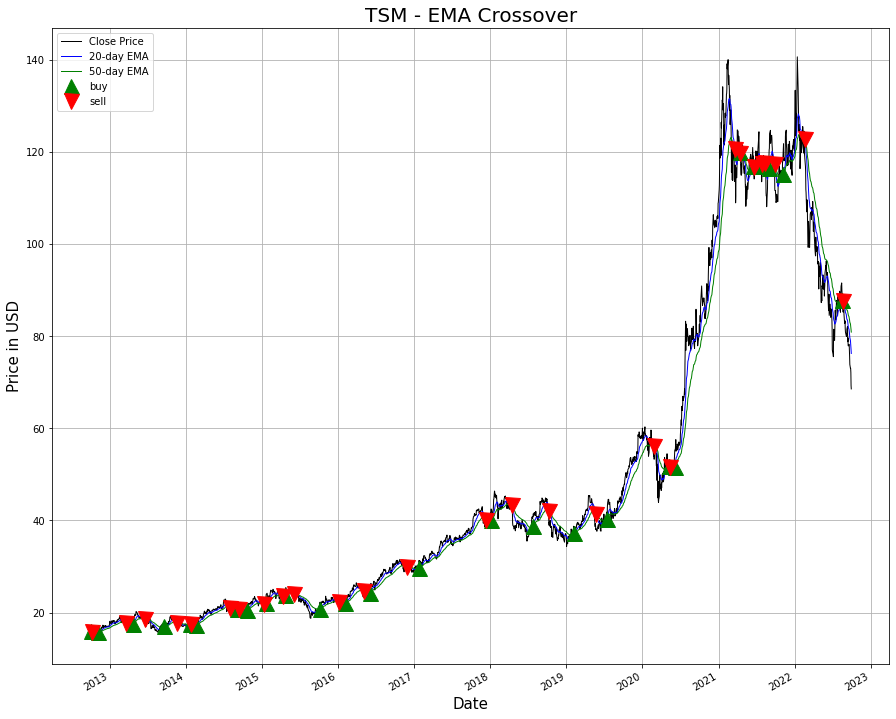

In [16]:
plt.figure(figsize = (15,13))
TSM_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
TSM_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
TSM_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
plt.plot(TSM_df[TSM_df['Position'] == 1].index, 
         TSM_df['20_EMA'][TSM_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(TSM_df[TSM_df['Position'] == -1].index, 
         TSM_df['20_EMA'][TSM_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSM - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()
